# Executive Summary

# High Level Goal

Your team has been hired to provide research for a political campaign. They have obtained a dataset of crime statistics for a selection of counties in North Carolina.

Your task is to examine the data to help the campaign understand the determinants of crime and to generate policy suggestions that are applicable to local government.

My Takeaway: Fundamentally, our goal is to
* A. _help understand the determinants of crime_
* B. _make informed policy suggestions accordingly_

_A_ will be a statistical task, and doing _B_ will be require us to wear socio-political hats. Presumably, the interest of our audience, a political campaign is to pitch itself to the public for election using informed policy ideas for _reducing_ crime.

In order to A, we must identify a measurable proxy for crime. I think that the most natural choice for this is the variable `crmrte` giving the crimes committed per person.


In [1]:
# Load the data
crime <- read.csv('crime_v2.csv')

## Exploratory Analysis

Checking for missing values.

In [2]:
summary(is.na(crime))

   county           year           crmrte          prbarr       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6         TRUE :6         TRUE :6        
  prbconv         prbpris          avgsen          polpc        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:97        FALSE:91        FALSE:91        FALSE:91       
                 TRUE :6         TRUE :6         TRUE :6        
  density          taxpc            west          central       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6         TRUE :6         TRUE :6        
   urban          pctmin80          wcon            wtuc        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6 

The output of the summary of missing values reveals that every column has precisely 6 missing values.

In [12]:
crime[91:nrow(crime), ]
paste0("Number of missing values in first 92 rows: ", sum(is.na(crime[1:91, ])))

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
91,197,87,0.0141928,0.207595,85,0.360825,12.23,0.00118573,0.889881,25.95258,⋯,341.8803,182.802,348.1432,212.8205,322.92,391.72,385.65,306.85,0.06756757,0.07419893


[1] "Number of missing values in first 92 rows: 0"

The last 6 rows are filled exclusively with `NA`s, while all the rows up to and including the 91st contain no missing values. Therefore, will omit the existing `NA`s with no loss of important information. 

In [4]:
crime <- na.omit(crime)

Now, we will have a quick look at the variables data types.

In [5]:
str(crime)

'data.frame':	91 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

All of the variables in this dataset aside are conceptually numeric, but the probabilty of conviction, `prbarr` has been inferred as a factor. Therefore, it is necessary to cast it as a numeric variable.

In [6]:
crime$prbconv <- as.numeric(crime$prbconv)

Additionally, we will remove the `county` and `year` because `year` is a constant, and the counties' unique nnumerical identifiers will not be relevant to any analysis.

In [77]:
crime <- crime[!names(crime) %in% c('year', 'county')]

The probabilty of conviction variable `prbconv` is registered as a factor, so we must cast it as a numeric before proceeding with EDA.

## Model V1.

Of the variables in the dataset, we believe that two of them are are the subjects of policy, while the rest are outside the immediate scope of its control. They are the key explanatory vaiables of interest and they are the following.
* Police per Capita
    * denoted `polpc`
    * correlation with crime: 0.17
* Tax Revenue per Capita
    * denoted `taxpc`
    * correlation with crime:  0.45


Let's take a glance at the relationships between crimerate, polic per capita and tax revenue.

In [10]:
# Correlation matrix for these variables
round(cor(crime[ ,c('crmrte', 'polpc', 'taxpc')]), 2)

,crmrte,polpc,taxpc
crmrte,1.00,0.17,0.45
polpc,0.17,1.00,0.28
taxpc,0.45,0.28,1.00


It appears that tax per capita is moderately positively correlated with crime rate while tax revenue per capita has a weak positive correlation per capita.

We now turn to the plots of crime and police and crime and tax revenue below.

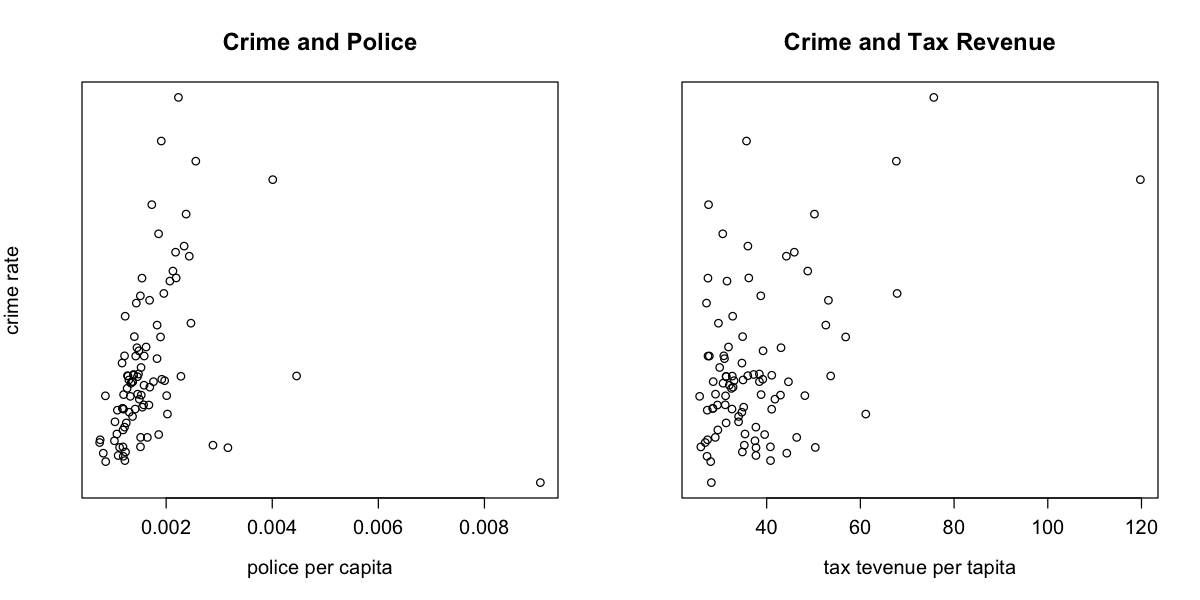

In [32]:
options(repr.plot.height = 5, repr.plot.width = 10, repr.plot.pointsize = 10)
par(mfrow=c(1,2))
y <- crime$crmrte
plot(crime$polpc, y, xlab = 'police per capita', ylab = 'crime rate', main = 'Crime and Police',  yaxt='n')
plot(crime$taxpc, y, xlab = 'tax tevenue per tapita', ylab = '', main ='Crime and Tax Revenue', yaxt='n')


The plot of crime against police per capita and tax revenue per capita, respectively, reveal postive associations with crimerate. We can also observe that in each plot there may be a couple outliers. In particular, there is one outlier in the crime and police plot with an extremely high police per capita rate which may have influenced the correlation between police per capita and crime rate too strongly. To get a better sense of the correlations between, we will compute correlation again after the removal of the aforementioned extreme outlier.

In [34]:
df.1 <- crime[crime$polpc < 0.008, ]
round(cor(df.1[, c('crmrte', 'polpc', 'taxpc')]), 2)

,crmrte,polpc,taxpc
crmrte,1.00,0.48,0.45
polpc,0.48,1.00,0.57
taxpc,0.45,0.57,1.00


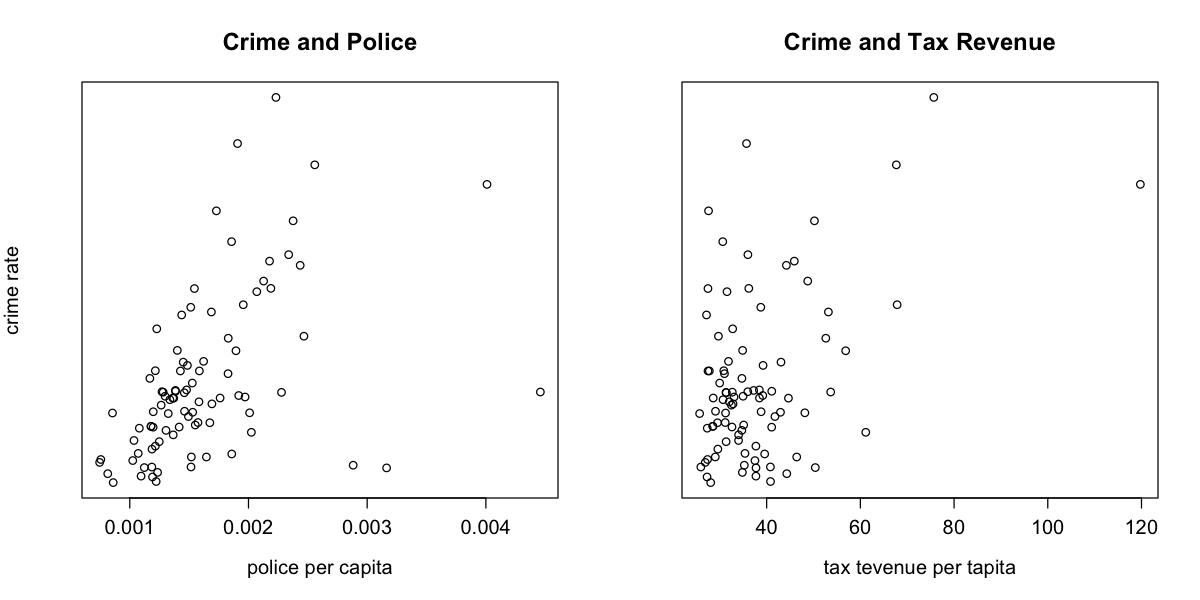

In [35]:
options(repr.plot.height = 5, repr.plot.width = 10, repr.plot.pointsize = 10)
par(mfrow=c(1,2))
y = df.1$crmrteh
plot(df.1$polpc, y, xlab = 'police per capita', ylab = 'crime rate', main = 'Crime and Police',  yaxt='n')
plot(df.1$taxpc, y, xlab = 'tax tevenue per tapita', ylab = '', main ='Crime and Tax Revenue', yaxt='n')

Thus our baseline model for understanding the determinants of crime will be a multiple OLS regression of the following form:

$$ crimerate = \beta_0 + \beta_1 polpc + \beta_2taxpc + \epsilon$$

In [38]:
model.1 <- lm(crmrte ~ log(polpc) + taxpc, data=crime)
summary(model.1)


Call:
lm(formula = crmrte ~ log(polpc) + taxpc, data = crime)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.045021 -0.008537 -0.001528  0.007064  0.053654 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0955835  0.0353739   2.702 0.008267 ** 
log(polpc)  0.0125874  0.0050674   2.484 0.014886 *  
taxpc       0.0005033  0.0001447   3.479 0.000785 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01641 on 88 degrees of freedom
Multiple R-squared:  0.2556,	Adjusted R-squared:  0.2387 
F-statistic: 15.11 on 2 and 88 DF,  p-value: 2.291e-06


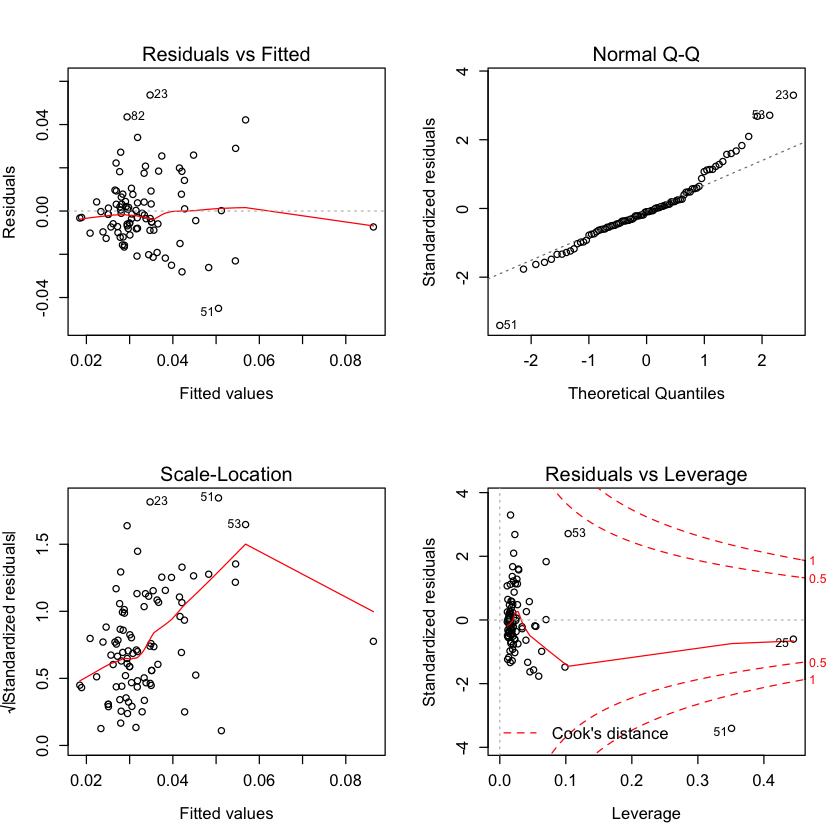

In [40]:
options(repr.plot.height = 7, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.1)

It appears that osbervation number 51 is an outlier which has heavily influenced the model. 

In [42]:
# model.1.1 <- lm(crmrte ~ log(polpc) + taxpc, data=crime[-c(51),])
# summary(model.1.1)

# options(repr.plot.height = 8, repr.plot.width = 8, repr.plot.pointsize = 10)
# par(mfrow = c(2,2))
# plot(model.1.1)

# Improving the V1 Model.

Now, seeking to improve, the model, we will introduce more variables into the multiple linear regression in order to increase the model's quality. However, We will be careful to not introduce new explanatory variables that are collinear with either `polpc` or `taxpc`.


In [47]:
round(cor(crime[ ,c('crmrte', 'density' , 'urban', 'pctmin80', 'pctymle', 'west', 'central') ]), 2)

,crmrte,density,urban,pctmin80,pctymle,west,central
crmrte,1.00,0.73,0.62,0.19,0.29,-0.35,0.17
density,0.73,1.00,0.82,-0.07,0.12,-0.14,0.36
urban,0.62,0.82,1.00,0.02,0.09,-0.09,0.16
pctmin80,0.19,-0.07,0.02,1.00,-0.02,-0.64,-0.04
pctymle,0.29,0.12,0.09,-0.02,1.00,-0.04,-0.10
west,-0.35,-0.14,-0.09,-0.64,-0.04,1.00,-0.40
central,0.17,0.36,0.16,-0.04,-0.10,-0.40,1.00


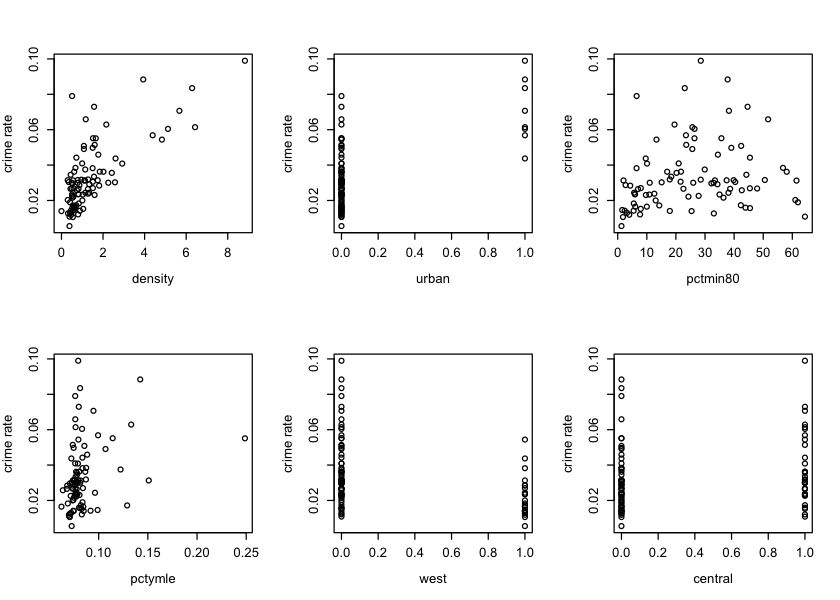

In [51]:
options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow=c(2,3))
cols <- c('density', 'urban', 'pctmin80', 'pctymle', 'west', 'central')
for (col in cols){
    plot(x=crime[, col], y=crime[, 'crmrte'], xlab = col, ylab = 'crime rate')
}

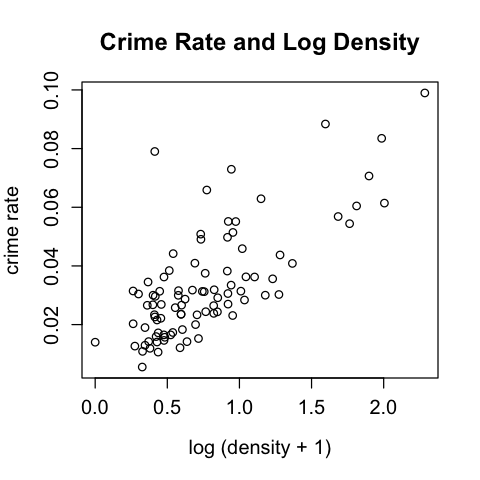

In [63]:
options(repr.plot.height = 4, repr.plot.width = 4, repr.plot.pointsize = 10)
par(mfrow=c(1,1))
plot(x=log(crime$density + 1), y=crime$crmrte, 
     xlab = 'log (density + 1)', 
     ylab = 'crime rate', 
     main = 'Crime Rate and Log Density')

From among our variables, we will include `density`, `urban` and `west`.


In [88]:
examined.cols <- c('polpc', 'taxpc', 'density', 'urban', 'pctmin80', 'pctymle', 'west', 'central')

round(cor(crime[!colnames(crime) %in% examined.cols]), 2)[,'crmrte']

crmrte  prbarr prbconv prbpris  avgsen    wcon    wtuc    wtrd    wfir    wser 
   1.00   -0.39   -0.40    0.05    0.03    0.39    0.23    0.41    0.33   -0.05 
   wmfg    wfed    wsta    wloc     mix 
   0.35    0.49    0.20    0.35   -0.13

In [90]:
round(cor(crime[!colnames(crime) %in% examined.cols], method = 'spearman'), 2)[,'crmrte']

crmrte  prbarr prbconv prbpris  avgsen    wcon    wtuc    wtrd    wfir    wser 
   1.00   -0.35   -0.35    0.00    0.09    0.38    0.21    0.32    0.21    0.31 
   wmfg    wfed    wsta    wloc     mix 
   0.46    0.53    0.11    0.37    0.03

In [96]:
# Checking for collinearity with key variables
new.cols <- c('polpc', 'taxpc', 'urban', 'density', 'west', 'wfed')
df.2 <- crime[new.cols]
df.2$log.wfed <- log(df.2$wfed)

In [104]:
round(cor(df.2), 2)[, c('polpc', 'taxpc', 'density')]

,polpc,taxpc,density
polpc,1.00,0.28,0.16
taxpc,0.28,1.00,0.32
urban,0.16,0.35,0.82
density,0.16,0.32,1.00
west,0.14,-0.19,-0.14
wfed,0.16,0.06,0.59
log.wfed,0.15,0.03,0.55


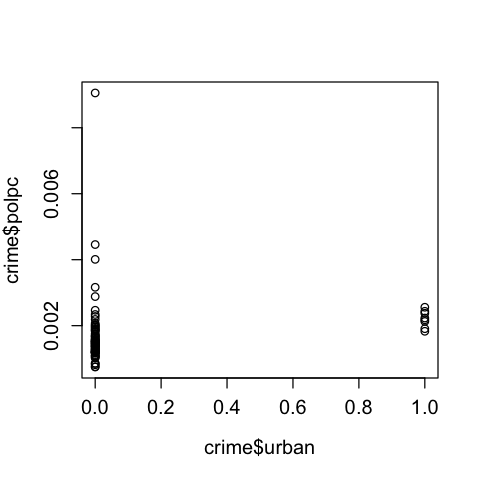

In [103]:
plot(crime$urban, crime$polpc)

In [102]:
model.2 <- lm(crmrte ~ polpc + taxpc + density + west + log(wfed), data=crime)
summary(model.2)


Call:
lm(formula = crmrte ~ polpc + taxpc + density + west + log(wfed), 
    data = crime)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.017720 -0.007059 -0.001947  0.003981  0.038933 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0635476  0.0686255  -0.926  0.35707    
polpc        0.6453935  1.3508421   0.478  0.63404    
taxpc        0.0003043  0.0001082   2.813  0.00609 ** 
density      0.0071346  0.0010474   6.812  1.3e-09 ***
west        -0.0093372  0.0029893  -3.123  0.00244 ** 
log(wfed)    0.0125627  0.0112699   1.115  0.26811    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01166 on 85 degrees of freedom
Multiple R-squared:  0.6371,	Adjusted R-squared:  0.6157 
F-statistic: 29.84 on 5 and 85 DF,  p-value: < 2.2e-16


In [ ]:
options(repr.plot.height = 8, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.2)

In [ ]:
pairs(crime[, c('crmrte', 'polpc','taxpc', 'urban', 'west','pctmin80','central','density','pctymle')])

In [ ]:
plot(crime$crmrte, log(crime$pctmin80))